In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2

In [3]:
pip install keras

In [ ]:
pip install yfinance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from datetime import datetime

In [2]:
# Load stock price data from Yahoo Finance using yfinance library
import yfinance as yf
ticker_symbol = "ITC.NS"  # Change to the stock symbol you want to predict
start_date = "2023-01-10"
end_date = "2023-10-10"
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Extract the 'Close' price column
df = data[['Close']]

In [4]:
# Data preprocessing
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

C:\Users\Vasan\AppData\Local\Temp\ipykernel_22016\341454535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [5]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size].values
test_data = df[train_size:].values

In [6]:
# Function to create sequences of data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust the sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
3/3 [==============================] - 5s 18ms/step - loss: 0.3911
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 0.1819
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0511
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0108
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0410
Epoch 6/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0232
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0063
Epoch 8/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0100
Epoch 9/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 10/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0134
Epoch 11/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0077
Epoch 12/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0052
Epoch 13/50
3/3 [==============================] - 0s 13ms/st

In [10]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


1/1 [==============================] - 1s 1s/step - loss: 0.0012
Test Loss: 0.0012039412977173924


In [11]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 1s 923ms/step


In [12]:
# Inverse transform the scaled predictions to get actual stock prices
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

In [13]:
test_dates = data.index[-len(y_test):] 

In [14]:
formatted_dates = [date.strftime("%Y.%m.%d") for date in test_dates]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '2023.08.30'),
  Text(1, 0, '2023.08.31'),
  Text(2, 0, '2023.09.01'),
  Text(3, 0, '2023.09.04'),
  Text(4, 0, '2023.09.05'),
  Text(5, 0, '2023.09.06'),
  Text(6, 0, '2023.09.07'),
  Text(7, 0, '2023.09.08'),
  Text(8, 0, '2023.09.11'),
  Text(9, 0, '2023.09.12'),
  Text(10, 0, '2023.09.13'),
  Text(11, 0, '2023.09.14'),
  Text(12, 0, '2023.09.15'),
  Text(13, 0, '2023.09.18'),
  Text(14, 0, '2023.09.20'),
  Text(15, 0, '2023.09.21'),
  Text(16, 0, '2023.09.22'),
  Text(17, 0, '2023.09.25'),
  Text(18, 0, '2023.09.26'),
  Text(19, 0, '2023.09.27'),
  Text(20, 0, '2023.09.28'),
  Text(21, 0, '2023.09.29'),
  Text(22, 0, '2023.10.03'),
  Text(23, 0, '2023.10.04'),
  Text(24, 0, '2023.10.05'),
  Text(25, 0, '2023.10.06'),
  Text(26, 0, '2023.10.09')])

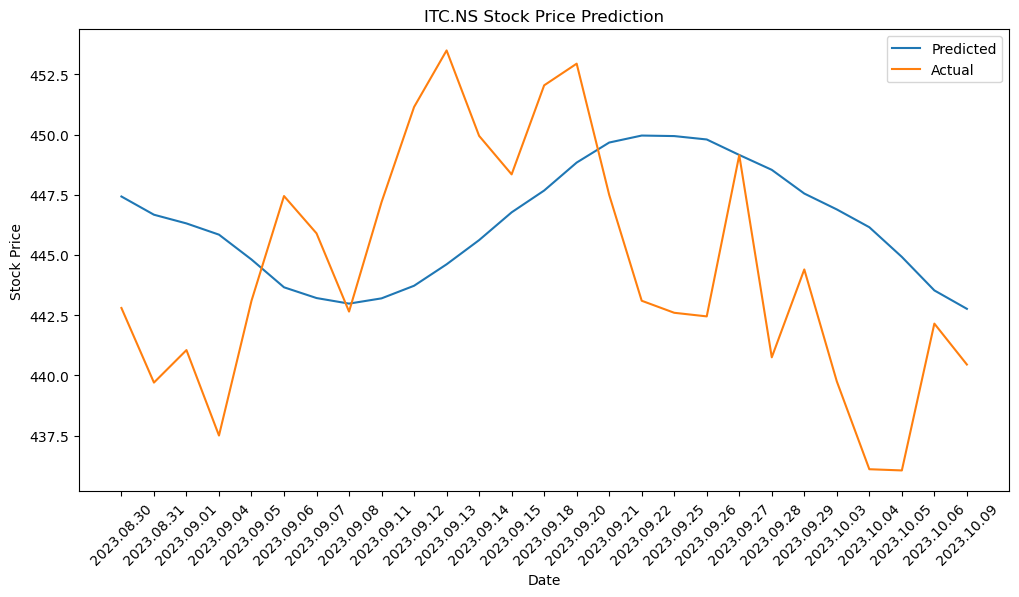

In [15]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(formatted_dates, predictions, label='Predicted')
plt.plot(formatted_dates, y_test, label='Actual')
plt.legend()
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)

In [16]:
forecasted_value = predictions[-1][0]
print(f'Forecasted Value (Next Day): {forecasted_value}')

plt.show()

Forecasted Value (Next Day): 442.7646179199219
